In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

https://link.springer.com/article/10.1134/S0015462821070053<br>
Kazakov, L.I. Laminar Flow of a Viscous Liquid in the Entrance Region of a Circular Pipe. Fluid Dyn 56, 954–966 (2021). https://doi.org/10.1134/S0015462821070053

fluid flow in a pipe

$R$ = pipe radious or beam radious<br>
$V_{0}$ = Velocity at the center of the pipe or beam<br>
$V(r)$ = the velocity of the pipe or beam at radious r

$$V(r) = V_{0}\left(1-\frac{r^2}{R^2}\right)$$

4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically;

$$\left(\frac{d\sigma}{d\Omega}\right)^* \Big\rvert_{CoM} \left(\sqrt s, \theta^*, \phi^*\right)= \frac{\alpha^2}{4s}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}\left[1+\frac{4}{s}\left(m_e^2+m_\mu^2\right)+\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\cos^2\theta^*\right]$$

This is the differential crossection equation. It expresses probability that an event happens at each possible scattering angle $\theta^*$. The * signifies that the variable $\theta$ is it's value in the center of mass frame.

The differential cross section can be expressed as

>$a + b cos^2(\theta^*)$$~~~~~~~~~~~~~~~~~~~$*(1.0)*

where,

$$a = \frac{\alpha^2}{4s}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{\alpha^2}{4s}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right]$$

The goal of this section is to generate a random distribution of scattering angles electron positron to muon pair events that follows the differntial cross section. 

Another way to say the same thing is that we aim to sample random numbers (angles) from the probability density function that is the differential cross section.

The sampling method used is known as Inverse Transmorm Sampeling. The goal of this method is to take a random number generated from the uniform probability density function $U$ and pass it into a function, $F(U)$, that returns a sample of our generated dataset $X$. i.e. the randomly generated angles. 

> $F(U) = X$$~~~~~~~~~~~~~~~~~~~$*(1.0)*


This function we seek can be shown to be the inverse of the cumulitive density function of our probability density function. The cululitive density function $CDF(x)$ is the probability of sampling an event with a value less than $x$.

To prove $CDF^-1(U)$ is indeed the function $F(U)$ we use probability notation. 

The CDF is defined as,$CDF(x) = \mathbb{P}(X<=x)$. If we sub in equation # then we get $\mathbb{P}(F(U)<=x)$. If we apply the inverse function $F^-1(U)$ to both sides of the inequality then we arrive at, $\mathbb{P}(U<=F^{-1}(x))$. The probability that a value sampled from the uniform distrubution is less than $F^-1(x)$. The uniform distribution is so that the probability of a vaule sampled less than a vaue is equal to that value. As can be seen in the uniform distribution below. The probability of sampling an $X < 0.8$ is the area of the blue section before the red line and this is 0.8 of the total area.

Thus $\mathbb{P}(U<=F^{-1}(x)) = F^{-1}(x)$ and so $CDF(x) = F^{-1}(x)$. These functions are the inverse of eachother. This means that $F(x)$ = $CDF^-1(x)$. This is true for any value of x. We can sub in the sample from our uniform distribution U and we get. 

> $F(U) = CDF^{-1}(U)$$~~~~~~~~~~~~~~~~~~~$*(2.0)*

We have now proved that the inverse of the CDF for a PDF is a function that will generate a sample from the PDF.



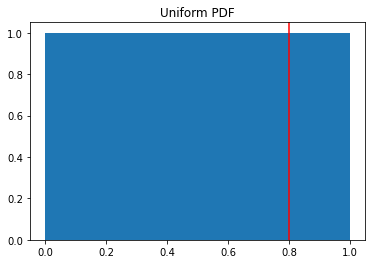

In [24]:
figuniform = plt.figure()
plt.bar(0.5,1, width = 1)
plt.title('Uniform PDF')
plt.axvline(x = 0.8,color = 'r')

The differential cross section is a PDF of the form,

>$a + b cos^2(\theta^*)$$~~~~~~~~~~~~~~~~~~~$*(1.0)*

where a and b are as defined above.

The $CDF(\theta^*)$ is defined as, $$CDF(\theta^*) = \int^{\theta^*}_{0}a + b cos^2(\theta^*)\,dx,$$

$$\int^{\theta^*}_{0}a + b cos^2(\theta^*)\,dx, => $$


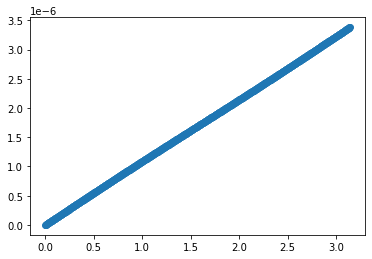

In [41]:
def dsc(theta,r):
    #Electron and Muon mass squared
    R = 1 #beam radious
    mu2 = 105.658**2 #Mev
    me2 = 0.5110**2 #Mev
    s0 = 4*mu2 + 1000 #Mev point 9, center beam energy
    s = s0*(1-r**2/R**2)#equation for partile beam energy as a function of radious based on fluid flow in a pipe.
    alpha = (math.e**2)/(4*math.pi)

    #constant to simplify calculation
    c1 = ((alpha**2)/(4*s)) * (1-(4*mu2/s))**(1/2) * (1-(4*me2/s))**(-1/2)

    a = c1 * (1+(4/s)*(me2+mu2))
    b = c1 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a + b*math.cos(theta)**2

def cdf(theta,r):
    #Electron and Muon mass squared
    R = 1 #beam radious
    mu2 = 105.658**2 #Mev
    me2 = 0.5110**2 #Mev
    s0 = 4*mu2 + 5000 #Mev point 9, center beam energy
    s = s0#220#s0*(1-r**2/R**2)#equation for partile beam energy as a function of radious based on fluid flow in a pipe.
    alpha = (math.e**2)/(4*math.pi)

    #constant to simplify calculation
    c1 = ((alpha**2)/(4*s)) * (1-(4*mu2/s))**(1/2) * (1-(4*me2/s))**(-1/2)

    a = c1 * (1+(4/s)*(me2+mu2))
    b = c1 * (1-(4*mu2/s)) * (1-(4*me2/s))
    
    return a*theta + ((b*theta)/2) + (b*math.sin(theta)*math.cos(theta)/2)


theta = np.linspace(0,math.pi,1000)
CDF = [cdf(x,0) for x in theta]

plt.plot(theta,CDF)






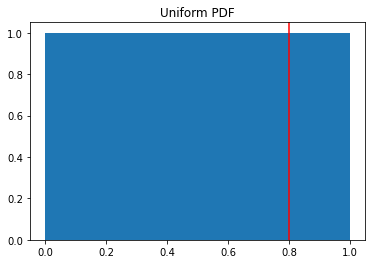

In [23]:
figuniform = plt.figure()
plt.bar(0.5,1, width = 1)
plt.title('Uniform PDF')
plt.axvline(x = 0.8,color = 'r')
